<b>DADOS  :</b> Balanceados --> Undersampling

<b>CODIFICACAO:</b> One-Hot Encoding

<b>ALGORITMO:</b> Arvore de Decisao

In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt

/Users/viniciuslucena/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv("../../Database/3.Dados_Transformados/dados_OneHot_UnderSampling.csv")

In [4]:
X = df.values[:,:30] # Atributos
Y = df.values[:,30]  # Rotulo

In [5]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=test_size, random_state = 100)

In [19]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
print("Acurácia : ", metrics.accuracy_score(y_test, y_pred))
print("Recall   : ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score : ", metrics.f1_score(y_test, y_pred))

Acurácia :  0.666666666667
Recall   :  0.842105263158
Precision:  0.629921259843
F1 Score :  0.720720720721


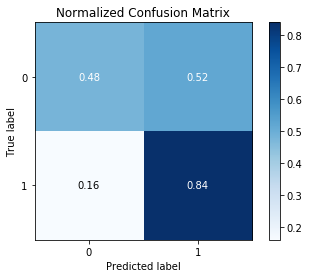

In [22]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
#plt.savefig("../5. Interpretacao/M3_MatrizConfusao_Undersampling_OneHot_Arvore.png", dpi=1000, transparent=True)

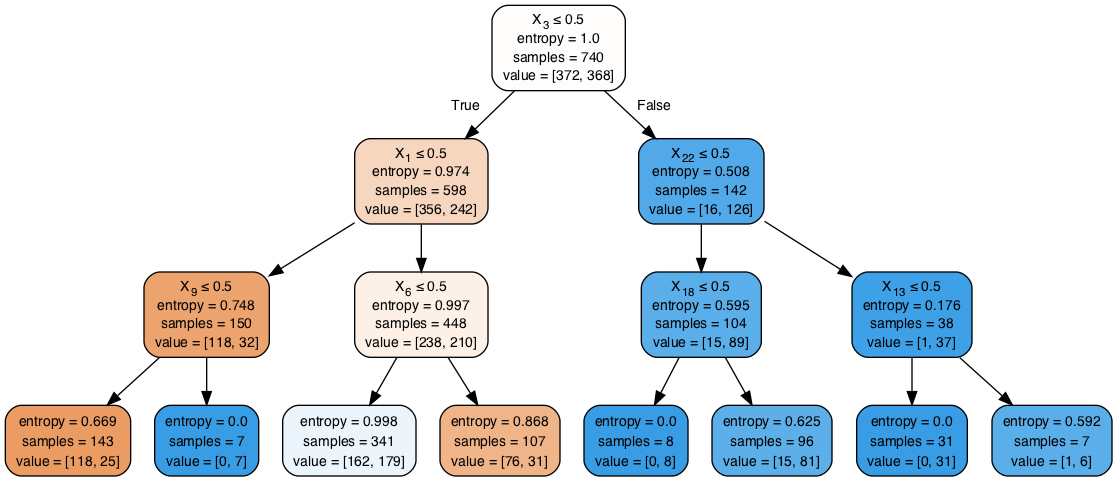

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
from sklearn import tree
dotfile = open("dt.dot", 'w')
tree.export_graphviz(classifier, out_file=dotfile, feature_names=list(df.iloc[:,0:30]), class_names=['NORMAL', 'GRAVE'], filled=True, proportion=False, rounded=True)
dotfile.close()

In [43]:
classifier.tree_.thresholds

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute 'thresholds'

---

### Salvando modelo

In [115]:
import pickle
filename = "Modelos/M3_Undersampling_OneHot_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---